In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textwrap import wrap
from math import pi

plt.gcf().subplots_adjust(bottom=-0.5)

plt.tight_layout()
plt.rcParams.update({'figure.autolayout': False})

#plt.ioff()

In [2]:
df = pd.read_csv('D:/002_OtherWork/Selfeval/All responses.csv')
df2 = pd.read_csv('D:/002_OtherWork/Selfeval/CollectorList.csv')
df3 = pd.read_excel('D:/002_OtherWork/Selfeval/Themes.xlsx')

df2 = df2[['CollectorID', 'Title']]
df = df2.merge(df, left_on='CollectorID', right_on='Collector ID')
df = df.rename(columns = {'Title':'Group'})
df = df.rename(columns = {'Strategy plan':'Leadership group'})

In [3]:
df = df.replace('Never true at all', '1. Never true at all')
df = df.replace('A little true', '2. A little true')
df = df.replace('Partially true', '3. Partially true')
df = df.replace('Mostly true', '4. Mostly true')
df = df.replace('Always fully true', '5. Always fully true')
df = df.replace('Listed group', 'Reference group')   
df = df.replace('Strategy plan', 'Leadership group') 
df = df.replace('Title', 'Group')  
df = df.replace('/', '') 

In [4]:
df.to_csv('D:/002_OtherWork/Selfeval/processed.csv')

In [28]:

def question(q):
    q1 = df.groupby([q, 'Group'])['Respondent ID'].count().reset_index()
    q1 = q1.pivot(index=q, columns='Group', values='Respondent ID')
    q1['Reference group'] = q1['Reference group']/q1['Reference group'].sum()*100
    q1['Leadership group'] = q1['Leadership group']/q1['Leadership group'].sum()*100
    q1['Leadership group'] = q1['Leadership group'].replace(np.nan, 0)
    
    
    return q1

def graph(d):
    ax = attach(d).plot()
    ax.set_xticklabels([0, '1. Never true at all', '', '2. A little true', '', '3. Partially true' , '', '4. Mostly true', '', '5. Always fully true'], rotation=90)
    ax.set_xlabel('Response')
    ax.set_ylabel('Percentage response')
    ax.legend(title = None)
    p = "\n".join(wrap(d, 55))
    ax.set_title(p)
    fig = plt.figure()

    fig = ax.get_figure()
    
    fig.savefig('D:/002_OtherWork/Selfeval/Graphs/'+d+'jpg', dpi = 300, figsize=(10,6), quality=80, optimize=True, progressive=True,bbox_inches = "tight")

In [22]:
d = 'We give appropriate recognition (beyond pay) for our employees  contributions and accomplishments.'
def attach(d):
    q = question('Our company offers excellent long term benefits as part of its policy to provide job security to its employees.')
    q.iloc[4:5,0] = 0
    q.iloc[4:5,1] = 0
    q = q.iloc[4:5]
    f = question(d).append(q).reset_index()
    f = f.groupby(['index'])['Reference group', 'Leadership group'].sum()
    return f

attach(d)

Group,Reference group,Leadership group
index,,
1. Never true at all,22.950820,18.75
2. A little true,40.983607,18.75
3. Partially true,22.950820,31.25
4. Mostly true,13.114754,31.25
5. Always fully true,0.000000,0.00


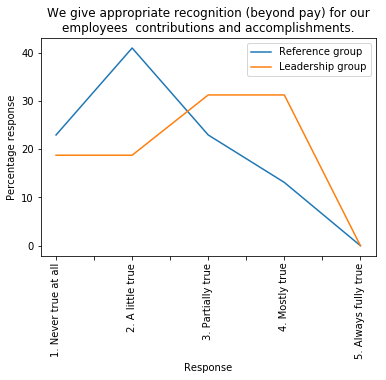

<Figure size 432x288 with 0 Axes>

In [29]:
graph(d)

In [396]:
question(d).to_csv('D:/002_OtherWork/Selfeval/Graphs/'+d+'.csv')


In [ ]:
for idx, val in enumerate(df.columns.values):
    if idx > 5:
        try:
            graph(val)
        except:
            pass

In [ ]:
dftheme1 = df[['Respondent ID', 'Group', 'Our employees believe they are compensated fairly for the work they do.',
              'Our company offers excellent long term benefits as part of its policy to provide job security to its employees.',
              'We give appropriate recognition (beyond pay) for our employees  contributions and accomplishments.',
              'At Aurecon, we focus on promoting the people best skilled to meet the future needs of the business.']]
dftheme1 = pd.melt(dftheme1, id_vars=['Respondent ID', 'Group'], value_vars=['Our employees believe they are compensated fairly for the work they do.',
              'Our company offers excellent long term benefits as part of its policy to provide job security to its employees.',
              'We give appropriate recognition (beyond pay) for our employees  contributions and accomplishments.',
              'At Aurecon, we focus on promoting the people best skilled to meet the future needs of the business.'])

dftheme1 = dftheme1.groupby(['variable', 'Group', 'value'])['Respondent ID'].count().reset_index()

dftheme1['variable'] = list(zip(dftheme1['variable'], dftheme1['Group']))
dftheme1 = dftheme1.set_index('variable')
dftheme1 = dftheme1[['value', 'Respondent ID']]
dftheme1 = dftheme1.pivot(columns='value', values='Respondent ID')
dftheme1.columns = ['1. Never true at all', '2. A little true', '3. Partially true', '4. Mostly true', '5. Always fully true']
dftheme1 = dftheme1.reset_index()

dftheme1 = dftheme1.set_index('variable')
dftheme1 = dftheme1.replace()

dftheme1 = dftheme1.fillna(0)
dftheme1['Total'] = dftheme1['1. Never true at all'] + dftheme1['2. A little true'] + dftheme1['3. Partially true']+ dftheme1['4. Mostly true']+ dftheme1['5. Always fully true']

dftheme1['1. Never true at all'] = dftheme1['1. Never true at all'] / dftheme1['Total'] * 100
dftheme1['2. A little true'] = dftheme1['2. A little true'] / dftheme1['Total'] * 100
dftheme1['3. Partially true'] = dftheme1['3. Partially true'] / dftheme1['Total'] * 100
dftheme1['4. Mostly true'] = dftheme1['4. Mostly true'] / dftheme1['Total'] * 100
dftheme1['5. Always fully true'] = dftheme1['5. Always fully true'] / dftheme1['Total'] * 100

dftheme1 = dftheme1[['1. Never true at all', '2. A little true', '3. Partially true', '4. Mostly true', '5. Always fully true']]

dftheme1

In [6]:
from bokeh.core.properties import value
from bokeh.io import output_notebook
from bokeh.models import FactorRange
from bokeh.palettes import Spectral5
from bokeh.plotting import figure, show
from math import pi
output_notebook()

p = figure(plot_width=800, x_range=FactorRange(*dftheme1.index))
p.vbar_stack(dftheme1.columns, x='variable', width=0.8, fill_color=Spectral5, 
             line_color=None, source=dftheme1, legend=[value(x) for x in dftheme1.columns]) 

p.legend.location = "top_left"
p.xaxis.major_label_orientation = pi/2
p.xaxis.group_text_color = 'green'

show(p)

Loading BokehJS ...

In [ ]:
d = ['Our employees believe they are compensated fairly for the work they do.',
              'Our company offers excellent long term benefits as part of its policy to provide job security to its employees.',
              'We give appropriate recognition (beyond pay) for our employees  contributions and accomplishments.',
              'At Aurecon, we focus on promoting the people best skilled to meet the future needs of the business.']

box = dict(facecolor='white', pad=5, alpha=0.2)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(12,12))
ax1.plot(attach(d[3]))
ax1.set_ylabel("\n".join(wrap(d[3], 50)), rotation=0, labelpad=200, ma = 'right', bbox=box, fontsize = 'x-large')

ax2.plot(question(d[1]))
ax2.set_ylabel("\n".join(wrap(d[1], 50)), rotation=0, labelpad=200, ma = 'right', bbox=box, fontsize = 'x-large')

ax3.plot(attach(d[2]))
ax3.set_ylabel("\n".join(wrap(d[2], 50)), rotation=0, labelpad=200, ma = 'right', bbox=box, fontsize = 'x-large')

ax4.plot(attach(d[0]))
ax4.set_ylabel("\n".join(wrap(d[0], 50)), rotation=0, labelpad=200, ma = 'right', bbox=box, fontsize = 'x-large')

f.suptitle('Rewards and recognition - Theme trends', fontsize=20)

ax4.set_xticklabels(['1. Never true at all','2. A little true',
                     '3. Partially true' ,'4. Mostly true','5. Always fully true'], rotation=90, fontsize = 'x-large')

f.set

f.savefig('D:/002_OtherWork/Selfeval/Rewards and recognition - Theme trends.jpg', dpi = 300, figsize=(10,6), quality=80, optimize=True, progressive=True,bbox_inches = "tight")

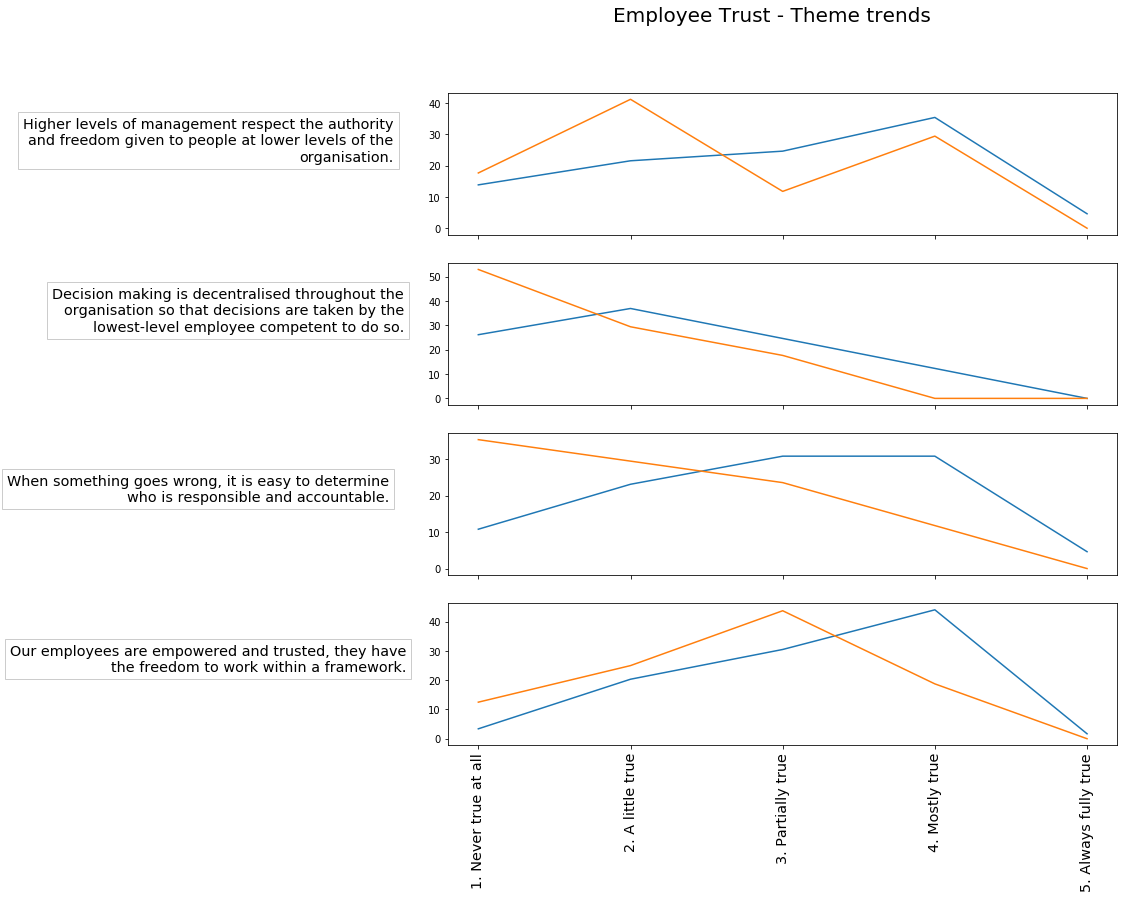

In [32]:
d = ['Higher levels of management respect the authority and freedom given to people at lower levels of the organisation.',
            'Decision making is decentralised throughout the organisation so that decisions are taken by the lowest-level employee competent to do so.',
            'When something goes wrong, it is easy to determine who is responsible and accountable.',
            'Our employees are empowered and trusted, they have the freedom to work within a framework.',
            'All our leaders are chosen on their capability to lead and inspire their teams instead of on their historic standing in the organisation.',
            'Our managers prossess a high level of organisational, managerial and interpersonal skills.',
             'Our staff has trust that our current management will deliver on their promises.'
    ]

box = dict(facecolor='white', pad=5, alpha=0.2)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(12,12))

ax1.plot(attach(d[0]))
ax1.set_ylabel("\n".join(wrap(d[0], 50)), rotation=0, labelpad=220, ma = 'right', bbox=box, fontsize = 'x-large')

ax2.plot(attach(d[1]))
ax2.set_ylabel("\n".join(wrap(d[1], 50)), rotation=0, labelpad=200, ma = 'right', bbox=box, fontsize = 'x-large')

ax3.plot(attach(d[2]))
ax3.set_ylabel("\n".join(wrap(d[2], 50)), rotation=0, labelpad=230, ma = 'right', bbox=box, fontsize = 'x-large')

ax4.plot(attach(d[3]))
ax4.set_ylabel("\n".join(wrap(d[3], 50)), rotation=0, labelpad=220, ma = 'right', bbox=box, fontsize = 'x-large')

f.suptitle('Employee Trust - Theme trends', fontsize=20)

ax4.set_xticklabels(['1. Never true at all','2. A little true',
                     '3. Partially true' ,'4. Mostly true','5. Always fully true'], rotation=90, fontsize = 'x-large')

f.set

f.savefig('D:/002_OtherWork/Selfeval/Employee Trust - Theme trends.jpg', dpi = 300, figsize=(10,6), quality=80, optimize=True, progressive=True,bbox_inches = "tight")

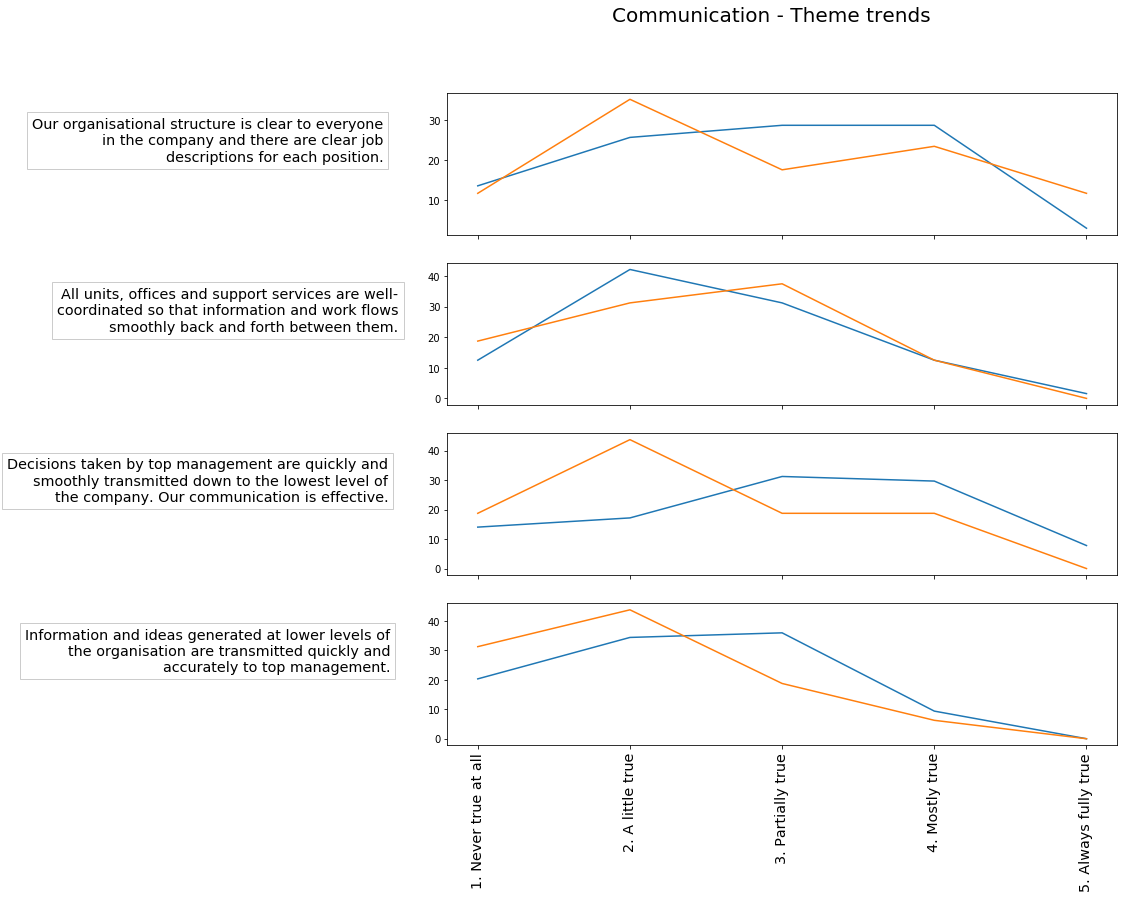

In [33]:
d = ['Our organisational structure is clear to everyone in the company and there are clear job descriptions for each position.',
     'All units, offices and support services are well-coordinated so that information and work flows smoothly back and forth between them.',
     'Decisions taken by top management are quickly and smoothly transmitted down to the lowest level of the company. Our communication is effective.',
     'Information and ideas generated at lower levels of the organisation are transmitted quickly and accurately to top management.',
    ]

box = dict(facecolor='white', pad=5, alpha=0.2)

f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(12,12))

ax1.plot(attach(d[0]))
ax1.set_ylabel("\n".join(wrap(d[0], 50)), rotation=0, labelpad=220, ma = 'right', bbox=box, fontsize = 'x-large')

ax2.plot(attach(d[1]))
ax2.set_ylabel("\n".join(wrap(d[1], 50)), rotation=0, labelpad=200, ma = 'right', bbox=box, fontsize = 'x-large')

ax3.plot(attach(d[2]))
ax3.set_ylabel("\n".join(wrap(d[2], 50)), rotation=0, labelpad=230, ma = 'right', bbox=box, fontsize = 'x-large')

ax4.plot(attach(d[3]))
ax4.set_ylabel("\n".join(wrap(d[3], 50)), rotation=0, labelpad=220, ma = 'right', bbox=box, fontsize = 'x-large')

f.suptitle('Communication - Theme trends', fontsize=20)

ax4.set_xticklabels(['1. Never true at all','2. A little true',
                     '3. Partially true' ,'4. Mostly true','5. Always fully true'], rotation=90, fontsize = 'x-large')

f.set

f.savefig('D:/002_OtherWork/Selfeval/Communication - Theme trends.jpg', dpi = 300, figsize=(10,6), quality=80, optimize=True, progressive=True,bbox_inches = "tight")

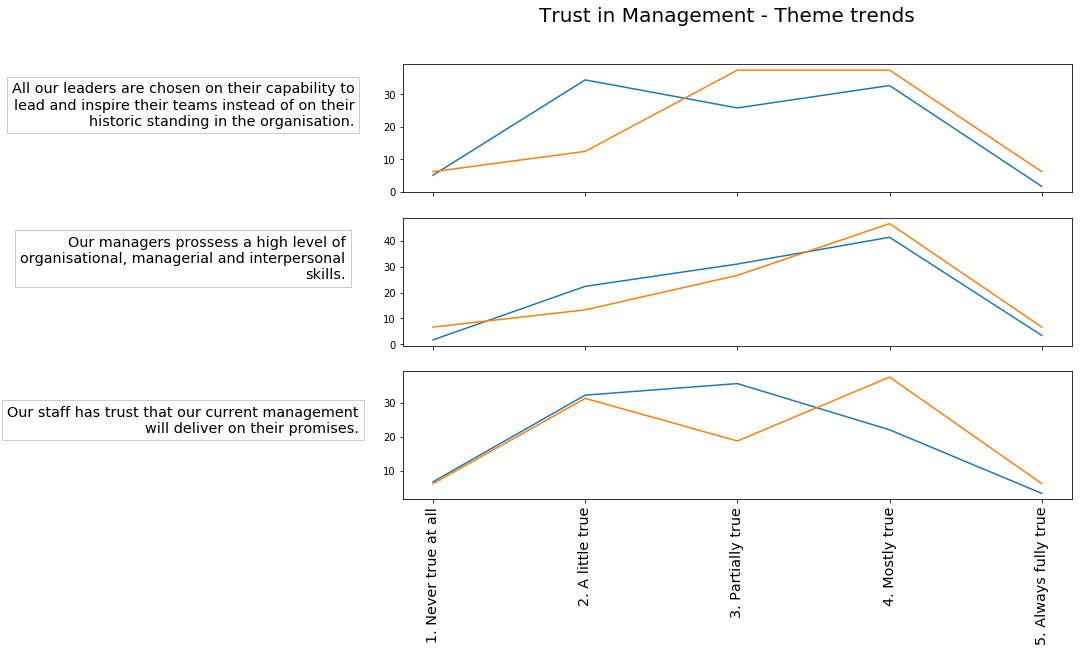

In [35]:
d = ['Higher levels of management respect the authority and freedom given to people at lower levels of the organisation.',
            'Decision making is decentralised throughout the organisation so that decisions are taken by the lowest-level employee competent to do so.',
            'When something goes wrong, it is easy to determine who is responsible and accountable.',
            'Our employees are empowered and trusted, they have the freedom to work within a framework.',
            'All our leaders are chosen on their capability to lead and inspire their teams instead of on their historic standing in the organisation.',
            'Our managers prossess a high level of organisational, managerial and interpersonal skills.',
             'Our staff has trust that our current management will deliver on their promises.'
    ]

f, (ax5, ax6, ax7) = plt.subplots(3, 1, sharex=True, figsize=(12,8))

ax5.plot(attach(d[4]))
ax5.set_ylabel("\n".join(wrap(d[4], 50)), rotation=0, labelpad=200, ma = 'right', bbox=box, fontsize = 'x-large')

ax6.plot(attach(d[5]))
ax6.set_ylabel("\n".join(wrap(d[5], 50)), rotation=0, labelpad=200, ma = 'right', bbox=box, fontsize = 'x-large')

ax7.plot(attach(d[6]))
ax7.set_ylabel("\n".join(wrap(d[6], 50)), rotation=0, labelpad=200, ma = 'right', bbox=box, fontsize = 'x-large')

f.suptitle('Trust in Management - Theme trends', fontsize=20)

ax7.set_xticklabels(['1. Never true at all','2. A little true',
                     '3. Partially true' ,'4. Mostly true','5. Always fully true'], rotation=90, fontsize = 'x-large')

f.set

f.savefig('D:/002_OtherWork/Selfeval/Trust in Management - Theme trends.jpg', dpi = 300, figsize=(10,6), quality=80, optimize=True, progressive=True,bbox_inches = "tight")